<div hidden>

\newcommand{\require}[1]{}

$\require{begingroup}\require{newcommand}$

$$
\gdef\R{\mathbb{R}}
\gdef\Cx{\mathbb{C}}
\gdef\Re{\mathrm{Re}}
\gdef\Im{\mathrm{Im}}
\gdef\Sin{S_{\mathrm{in}}}
\gdef\Fin{F_{\mathrm{in}}}
\gdef\Fout{F_{\mathrm{out}}}
\gdef\mumax{\mu_{\max}}
\gdef\dd{\mathrm{d}}
\gdef\ds{\mathrm{d}s}
\gdef\dx{\mathrm{d}x}
\gdef\dt{\mathrm{d}t}
\gdef\dq{\mathrm{d}q}
\gdef\ddt{\frac{\dd}{\dt}}
\gdef\dsdt{\frac{\ds}{\dt}}
\gdef\dxdt{\frac{\dx}{\dt}}
\gdef\dvdt{\frac{\dd v}{\dt}}
\gdef\dvsdt{\frac{\dd (vs)}{\dt}}
\gdef\dvxdt{\frac{\dd (vx)}{\dt}}
\gdef\dqdt{\frac{\dq}{\dt}}
\gdef\partials#1#2{\frac{\partial#1}{\partial#2}}
\gdef\gL{g\cdot L^{-1}}
\gdef\CC{\mathcal{C}}
\gdef\vect{\mathrm{span}}
\gdef\pp#1{\left(#1\right)}
\gdef\bb#1{\left[#1\right]}
\gdef\cb#1{\left\{#1\right\}}
\gdef\abs#1{\left\lvert#1\right\rvert}
\gdef\norm#1{\left\lVert#1\right\rVert}
\gdef\sset#1#2{\cb{#1\left\lvert#2\right.}}
\gdef\mat#1{\begin{matrix}#1\end{matrix}}
\gdef\pmat#1{\begin{pmatrix}#1\end{pmatrix}}
\gdef\vmat#1{\begin{vmatrix}#1\end{vmatrix}}
\gdef\ub#1#2{\underbrace{#1}_{\substack{\text{#2}}}}
$$
</div>

# Growth of a single species

In this notebook we will study the dynamics of a minimal model of the growth
of a single species in a chemostat.

## Constructing the model

We consider the dynamics of microbial growth of a single species in stirred tank
reactors (chemostat) assuming the medium is homogeneous.

Let's consider:
- $s(t)$ is the substrate concentration ($\gL$) at time $t$
- $x(t)$ is the biomass concentration ($\gL$) at time $t$
- $v(t)$ is the volume of the culture medium ($L$) at time $t$
- $\Sin$ is the substrate intake concentration ($\gL$)
- $\Fin$ is the influent flow rate ($L h^{-1}$)
- $\Fout$ is the effluent flow rate ($L h^{-1}$)
- $\mu(\cdot)$ is a the specific growth velocity function, assumed to be positive and of class $\CC^1$,
  its values are measured in $h^{-1}$.
- $Y$ is the yield of substrate consumption

The model can be constructed as follows:
$$\begin{cases}
\dvxdt &=\ub{\mu(\cdot)vx}{biomass growth} - \ub{\Fout x}{biomass loss}\\
\dvsdt &=-\ub{\frac{\mu(\cdot)}{Y}vx}{substrate consumption} + \ub{\Fin\Sin}{substrate mass intake} - \ub{\Fout s}{substrate mass loss}\\
\dvdt  &=\Fin - \Fout
\end{cases}$$

The equations describing $\dvxdt$ and $\dvsdt$ can be simplified by exploiting the derivative of a product
\begin{align}
\dvxdt &= \mu(\cdot)vx - \Fout x\\
\dvdt x + v\dxdt &= \mu(\cdot)vx - \Fout x\\
(\Fin - \Fout)x + v\dxdt &= \mu(\cdot)vx - \Fout x\\
\dxdt &= \mu(\cdot)x - \frac{\Fin}{v} x
\end{align}

similarly
\begin{align}
\dvsdt &= -\frac{\mu(\cdot)}{Y}vx + \Fin\Sin - \Fout s\\
\dvdt s + v\dsdt &= -\frac{\mu(\cdot)}{Y}vx + \Fin\Sin - \Fout s\\
(\Fin - \Fout)s + v\dsdt &= -\frac{\mu(\cdot)}{Y}vx + \Fin\Sin - \Fout s\\
\dsdt &= -\frac{\mu(\cdot)}{Y}x + \frac{\Fin}{v}(\Sin - s)
\end{align}

By defining the dilution rate $D=\frac{\Fin}{v}$ we can rewrite the system
in terms of concentrations

$$\begin{cases}
\dsdt = -\frac{\mu(\cdot)}{Y}x + D(\Sin - s)\\
\dxdt = (\mu(\cdot) - D)x\\
\dvdt = \Fin - \Fout
\end{cases}$$

where
- $s(t)$ is the substrate concentration ($\gL$) at time $t$
- $x(t)$ is the biomass concentration ($\gL$) at time $t$
- $v(t)$ is the volume of the culture medium ($L$) at time $t$
- $\Sin$ is the substrate intake concentration ($\gL$)
- $D$ is the dilution rate ($h^{-1}$)
- $\mu(\cdot)$ is a the specific growth velocity function, assumed to be positive and of class $\CC^1$,
  its values are measured in $h^{-1}$.
- $Y$ is the yield of substrate consumption

All of the values and parameters are positive.

In this study, we will only consider the case of a continuous stirred tank reactor
where the rate of outflow is equal to the rate of inflow which means that $\dvdt = 0$.
We denote $F=\Fin=\Fout$ and $D=\frac{F}{v}$

## Specific growth velocity $\mu$

For the minimal model, we consider $\mu$ a function of the substrate concentration $s$.
Moreover, we suppose that $\mu$ is of the *Monod type*, such that

- $\mu(0)=0$
- $\mu'(s)>0, \forall s\geq 0$
- $\mu([0,\infty[) = [0,\mumax[$

The **Monod function**, verifying these conditions is defined as
$$\mu(s) = \frac{\mu_{\max}s}{k_s + s}$$

where $k_s$ is called the *semi-saturation* constant since $\mu(k_s)=\frac{\mumax}{2}$.

## Conservation principle

Let $\sigma(t)=Ys(t)+x(t)$, it leads that

\begin{align}
\dot{\sigma} &= Y\dot{s} + \dot{x}\\
&= Y\pp{-\frac{\mu(\cdot)}{Y}x + D(\Sin - s)} + (\mu(\cdot) - D)x\\
&= -\mu(\cdot)x + YD(\Sin - s) + \mu(\cdot)x - Dx\\
&= YD\Sin - D(Ys + x)\\
&= D(Y\Sin - \sigma)
\end{align}

Therefore, $\sigma(t)$ has an autonomous first-order ordinary differential equation
(independent of $s(t)$ and $x(t)$, i.e. $\dot{\sigma}=f(\sigma)$),
which admits a unique solution given an initial condition $\sigma(0)$.
$$\sigma(t) = \sigma(0)e^{-Dt} + Y\Sin(1 - e^{-Dt}) = Y\Sin + (\sigma(0) - Y\Sin)e^{-Dt}$$

From this solution, we can conclude that $\lim\limits_{t\to\infty}\sigma(t) = Y\Sin$
for any given initial condition $\sigma(0)$.
Therefore, all trajectories of the system are asymptotic to the set
$\Sigma = \sset{(s,x)\in\R_+^2}{Ys + x = Y\Sin}$.

Moreover, if $\exists\tau\in\R_+,(s(\tau),x(\tau))\in\Sigma$ then $\forall t\in\R,(s(t),x(t))\in\Sigma$
which means that $\Sigma$ is an invariant set.
Indeed, $\Sigma = \sset{(s,x)\in\R_+^2}{\dot{\sigma}=0}$.

In fact, all things considered, $\Sigma$ is an **exponentially attracting invariant set**.

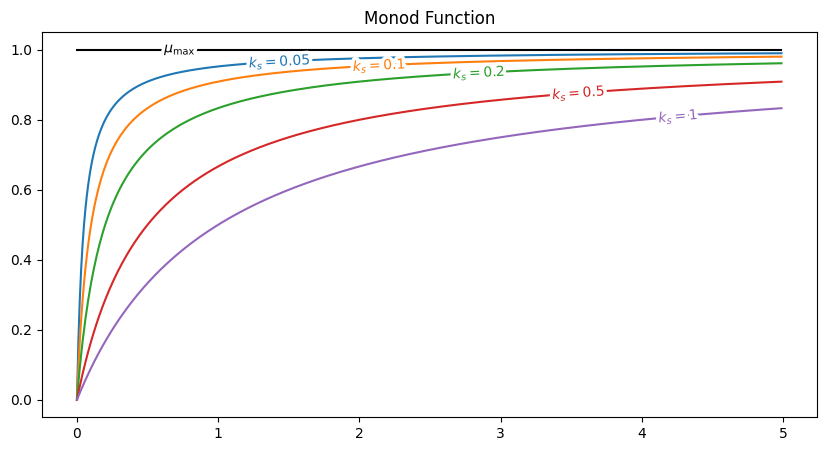

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines

def mu(s, μmax=1.0, ks=0.2):
    return (μmax*s) / (ks + s)

plt.figure(figsize=(10,5))
plt.title("Monod Function")

s = np.arange(0, 5, 0.01)
plt.plot(s, np.ones(len(s)), color='black', label='$\\mu_\\max$')
for ks in [0.05, 0.1, 0.2, 0.5, 1]:
    plt.plot(s, mu(s, ks=ks), label='$k_s={}$'.format(ks))

labelLines(plt.gca().get_lines(), zorder=2.5)
plt.show()

## The minimal model definition

We consider the yield $Y$ to be a non-zero constant,
with a simple variable change $\tilde{x}=\frac{x}{Y}$ we get

$$\begin{cases}
\dsdt = -\mu(s)\tilde{x} + D(\Sin - s)\\
\frac{\dd\tilde{x}}{\dt} = \frac{1}{Y}\dxdt = \frac{(\mu(s) - D)x}{Y} = (\mu(s) - D)\tilde{x}
\end{cases}$$

since $Y$ does not intervene in either equations,
it merely is a scaling factor for $x(t)$ and has no effect on the dynamics
of the studied model, we can simply set $Y=1$,
hence obtaining the *minimal model*:

$$\boxed{\begin{cases}
\dsdt = -\mu(s)x + D(\Sin - s)\\
\dxdt = (\mu(s) - D)x
\end{cases}}$$

Now that we have defined the model, so without further ado, we can study its dynamics.

## Model dynamics

### Nullclines

Nullclines (zero-growth isoclines).

#### Biomass nullcline $\dxdt=0$

We seek to find the states of the system $(s, x)$ at which the biomass is invariant.
Let'es denote,
$$ I_x = \sset{(s,x)\in\R^2_+}{\dxdt=0} $$
Expanding the expression for $\dxdt$
\begin{align}
I_x &= \sset{(s,x)\in\R^2_+}{(\mu(s) - D)x=0}\\
&= \sset{(s,x)\in\R^2_+}{x=0} \cup \sset{(s,x)\in\R^2_+}{\mu(s) - D=0,D\lt\mumax}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(s,x)\in\R^2_+}{\mu(s)=D\lt\mumax}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(s,x)\in\R^2_+}{s=\mu^{-1}(D),D\lt\mumax}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(\mu^{-1}(D),x)\in\R^2}{D\lt\mumax}
\end{align}

The set $\cb{(s,0)}$ is the horizontal axis, which corresponds to no biomass ($x=0$),
this axis in logically invariant.

The set $\cb{(\mu^{-1}(D),x)}$ corresponds to the vertical line that corresponds
to the substrate concentration $s=\mu^{-1}(D)$ which is a well-defined value
if $D\lt\mumax$ for any Monod-type function $\mu$ since a Monod-type function
is monotonic (specifically: increasing) and positive $\forall s\geq 0$.

For the Monod function $\mu(s)=\frac{\mumax s}{k_s + s}$,
we can easily find the exression for $\mu^{-1}$ by setting $\mu(s)=r\in[0,\mumax[$.
$$\mu(r) = \frac{r k_s}{\mumax - r}$$

The biomass nullcline is therefore the union of these two lines
(if the vertical line is well-defined).

#### Substrate nullcline $\dsdt=0$

Similarly as for the biomass, we aim to find the states $(s,x)$
that leave the substrate concentration invariant.
\begin{align}
I_s &= \sset{(s,x)\in\R^2_+}{\dsdt=0}\\
&= \sset{(s,x)\in\R^2_+}{-\mu(s)x + D(\Sin - s) = 0}\\
&= \sset{(s,x)\in\R^2_+}{x = \frac{D(\Sin - s)}{\mu(s)}}\\
&= \cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+}
\end{align}

### Equilibria

We search for the system's equilibria; points at which $\dsdt=0$ and $\dxdt=0$.
The set of equilibrium points can be defined as $E = I_s \cap I_x$.
Which corresponds geometrically to the intersection of the $I_x$ nullclines with the $I_s$ nullcline.
Naturally, $E\subset\Sigma$ as $\sigma$ is a function of $s$ and $x$.

\begin{align}
E &= I_s \cap I_x\\
&= \cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \pp{\cb{(s,0)\in\R^2_+} \cup \sset{(\mu^{-1}(D),x)\in\R^2_+}{D\lt\mumax}}\\
&= \pp{\cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \cb{(s,0)\in\R^2_+}} \cup
   \pp{\cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \cb{(\mu^{-1}(D),x)\in\R^2_+}}\\
&= \sset{\pp{s,0}\in\R^2_+}{\frac{D(\Sin - s)}{\mu(s)} = 0} \cup
   \sset{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+}{s=\mu^{-1}(D)}\\
&= \sset{\pp{s,0}\in\R^2_+}{\Sin - s = 0} \cup
   \cb{\pp{\mu^{-1}(D),\frac{D(\Sin - \mu^{-1}(D))}{\mu(\mu^{-1}(D))}}\in\R^2_+}\\
&= \cb{\pp{\Sin,0}} \cup \sset{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}{\Sin - \mu^{-1}(D)>0}\\
&= \underbrace{\cb{\pp{\Sin,0}}}_{E_0} \cup
   \underbrace{\sset{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}{\mu(\Sin)>D}}_{E_1}
\end{align}

While $E_0$ exists, and lays on the $x=0$ nullcline, $E_1$ is empty if $\mu(\Sin)<D$
as the equilibrium falls in the fourth quadrant ($x<0$), which does not make
sense as we only deal with positive values of biomass.
In the case $\mu(\Sin)=D$ we have $E_0 = E_1$.

Moreover, $\mu^{-1}(D)$ is only defined for $D\lt\mumax$.
Hence, $E_1$ is non-empty for $D\in]\mu(\Sin),\mumax[$.

<Figure size 640x480 with 0 Axes>

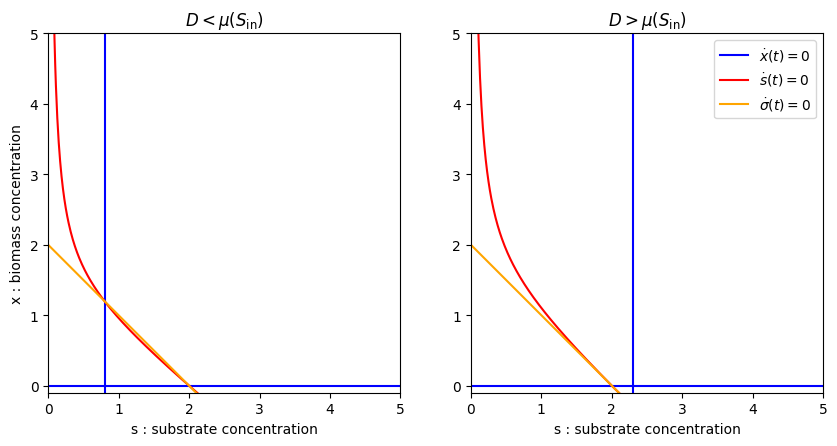

In [2]:
%run ../model.py
%run ../api.py
plt.rcParams["figure.figsize"]=10,10

fig, (ax1,ax2) = plt.subplots(1, 2)
for ax in [ax1, ax2]:
    ax.axis([-0, 5, -0.1, 5])
    ax.axes.set_aspect('equal')
    ax.set_xlabel('s : substrate concentration')

params.update(D=0.8)
plot_isocline_dx(ax1, **params)
plot_isocline_ds(ax1, **params)
plot_sigma(ax1, **params)
ax1.set_title('$D<\\mu(S_\\mathrm{{in}})$')
ax1.set_ylabel('x : biomass concentration')

params.update(D=0.92)
plot_isocline_dx(ax2, **params)
plot_isocline_ds(ax2, **params)
plot_sigma(ax2, **params)
ax2.set_title('$D>\\mu(S_\\mathrm{{in}})$')

plt.legend()
plt.show()

## Local stability around equilibria

Identifying equilibria is the first step in studying a non-linear system,
as the study of the system around its equilibria allows a better understanding
of its global behaviour.

In order to study its local behaviour around equilibria, we linearize the system
with the help of its first order Taylor expansion.

Considering a system, defined by it's state equation $\dqdt = f(q,t)$ where $q(t)$
is the system's state vector at time $t$.
Formally, let $U\subset\R^n$, we have

$$\mat{
f: & U\times\R & \rightarrow & \R^n\\
   & (q,t)     & \mapsto     & \pmat{f_1(q,t)\\\vdots\\ f_n(q,t)}
}$$


The linearized system around an equilibrium $q_0$ is given by the Taylor formula of $f$
$$ f(q,t) = f(q_0,t) + \nabla_q f(q_0,t)(q - q_0) + o(\norm{q-q_0}) $$
where $\nabla_q f$ is the Jacobian of $f$ with respect to $q$, that is

$$\nabla_q f = \pmat{
    \partials{f_1}{q_1} & \cdots & \partials{f_1}{q_n}\\
    \vdots              & \ddots & \vdots\\
    \partials{f_n}{q_1} & \cdots & \partials{f_n}{q_n}
}$$


We can therefore describe the system $\forall q\in B_r(q_0)$ for a sufficiently small $r>0$
where $B_r(q_0) = \sset{q\in\R^n}{\norm{q-q_0}<r}$ is an open ball.
$$\dqdt\approx f(q_0,t) + J_f(q_0)(q(t)-q_0)$$

Since $q_0$ is an equilibrium, by definition $f(q_0,t)=0,\forall t$, we can translate the system
in order to take $q_0$ to the origin, let $\tilde{q}(t)=q(t)-q_0$, we have a linear system
$$\frac{\dd\tilde{q}}{\dt}\approx J_f(q_0) \tilde{q}(t)$$

### System Jacobian

In the case of the chemostat model

$$\begin{cases}
\dsdt = f_1(s,x) = -\mu(s)x + D(\Sin - s)\\
\dxdt = f_2(s,x) = (\mu(s) - D)x
\end{cases}$$

$$J(s,x) = \pmat{
\partials{f_1}{s} & \partials{f_1}{x}\\
\partials{f_2}{s} & \partials{f_2}{x}}
= \pmat{-\mu'(s)x - D & -\mu(s) \\\mu'(s)x & \mu(s)-D}$$

#### System around $E_0$

$$A=J(\Sin,0)=\pmat{-D & -\mu(\Sin)\\0 & \mu(\Sin)-D}$$

We consider the system in a small open ball around $E_0=(\Sin,0)$,
let $\pmat{\tilde s\\\tilde x} = \pmat{s\\x} - \pmat{\Sin\\0}$.
$$ \ddt\pmat{\tilde s\\\tilde x} = A\pmat{\tilde s\\\tilde x} $$
The eigenvalues and eigenvectors of $A$ allow studying the stability
of the system around $E_0$. Moreover, the solution of the linear system is
$$ \pmat{\tilde s(t)\\\tilde x(t)} = \exp(At) \pmat{\tilde s(0)\\\tilde x(0)} $$
and the exponential of a square matrix is easily obtained from the diagonalized
matrix which has the eigenvalues on its diagonal.

For now, we will only study the eigenvalues, eigenvectors, and eigenspaces.

##### Eigenvalues and Eigenvectors

Let $\lambda\in\Cx,v\in\R^n$, we say that $\lambda$ is an eigenvalue of $A$
and $v\in\R^n$ is an eigenvector of $A$ associated to $\lambda$ if and only if
$$ A v = \lambda v$$
Or equivalently, $(A-\lambda Id)v = 0_{\R^n}$.

The eigenvalues are the roots of the characteristic polynomial $\chi_\lambda=\det(A-\lambda Id)$
and the associated eigenspace $S=\ker(A-\lambda Id)$.

Here,
$$\chi_\lambda=\det(A-\lambda Id)
= \vmat{-\mu'(s)x - D - \lambda & -\mu(s) \\\mu'(s)x & \mu(s)-D - \lambda}
= (-D-\lambda)(\mu(\Sin)-D-\lambda)
\implies \begin{cases}
\lambda_1 = -D\\
\lambda_2 = \mu(\Sin)-D
\end{cases}$$

- $S_{A,1} = \ker(A-\lambda_1 Id) = \ker(A+D Id) = \ker\pmat{0 & -\mu(\Sin)\\0 & \mu(\Sin)} = \ker\pmat{0 & -1\\0 & 1} = \vect\cb{\pmat{1\\0}}$
- $S_{A,2} = \ker(A-\lambda_2 Id) = \ker(A-(\mu(\Sin)-D) Id) = \ker\pmat{-\mu(\Sin)&-\mu(\Sin)\\0&0} = \ker\pmat{1&1\\0&0} = \vect\cb{\pmat{1\\-1}}$

##### **Stability of a linear system**

In the case of an $n$-dimensional linear system $\dqdt = f(q,t) = Aq(t)$,
the origin is its sole equilibrium $f(q,t)=0\iff q(t)=0_{\R^n}$.

- **Stable** if the system's state does not get further from the equilibrium
  with respect to its initial state $\forall t$.
- **Asymptotically stable** or **attractor** if the system's state converges
  to the equilibrium.
- **Unstable** if the system's state gets further from the equilibrium.

Naturally, if a linear system's state is at the origin,
it stays at the origin, since $f(0_{\R^n},t)=0_{\R^n},\forall t$.
The remaining question is, whether for $q(0)\neq 0_{\R^n}$,
the system's state would get closer/further from the origin,
or maintain the same distance.

In the case of a one-dimensional linear system $\dqdt=a q(t)$
the state can be explicitly expressed as $q(t)=e^{at}q(0)$.

- If $a=0$, then $q(t)=q(0),\forall t$ therefore the system is stable.
- If $a\lt 0$, then $\lim\limits_{t\rightarrow\infty} q(t) = 0$
  therefore the system is asymptotically stable.
- If $a\gt 0$, then $q(t)$ clearly diverges from the origin,
  therefore the system is unstable.

The same reasoning can be applied for an $n$-dimensional system,
as $q(t)=e^{At}q(0)$, therefore the eigenvalues can help determine
the stability at the equilibrium (the origin).
Let $\rho(A)$ be the spectrum of $A$.

- If $\forall \lambda\in\rho(A), \Re(\lambda)\leq 0$ the system is stable.
- If $\forall \lambda\in\rho(A), \Re(\lambda)\lt 0$ the system is asymptotically stable.
- If $\exists \lambda\in\rho(A), \Re(\lambda)\gt 0$ the system is unstable.

##### **Local stability around an equilibrium**

The local stability around an equilibrium is determined
by the stability of the linearized system around that equilibrium.
Since the Jacobian of the system at the equilibrium is the matrix
of the linearized system, we study its spectrum to study its stability.

In the case of $E_0=(\Sin,0)$ the spectrum of the Jacobian is $\rho=\cb{-D,\mu(\Sin)-D}$.
Since $\lambda_1=-D\lt 0$, the stability is solely determined by $\lambda_2=\mu(\Sin)-D$.
- If $D\lt \mu(\Sin)$ then $\lambda_2\gt 0$, then the system is locally unstable around $E_0$.
- If $D\gt \mu(\Sin)$ then $\lambda_2\lt 0$, then $E_0$ is a local attractor
  (i.e. points close enough to $E_0$ converge to $E_0$).

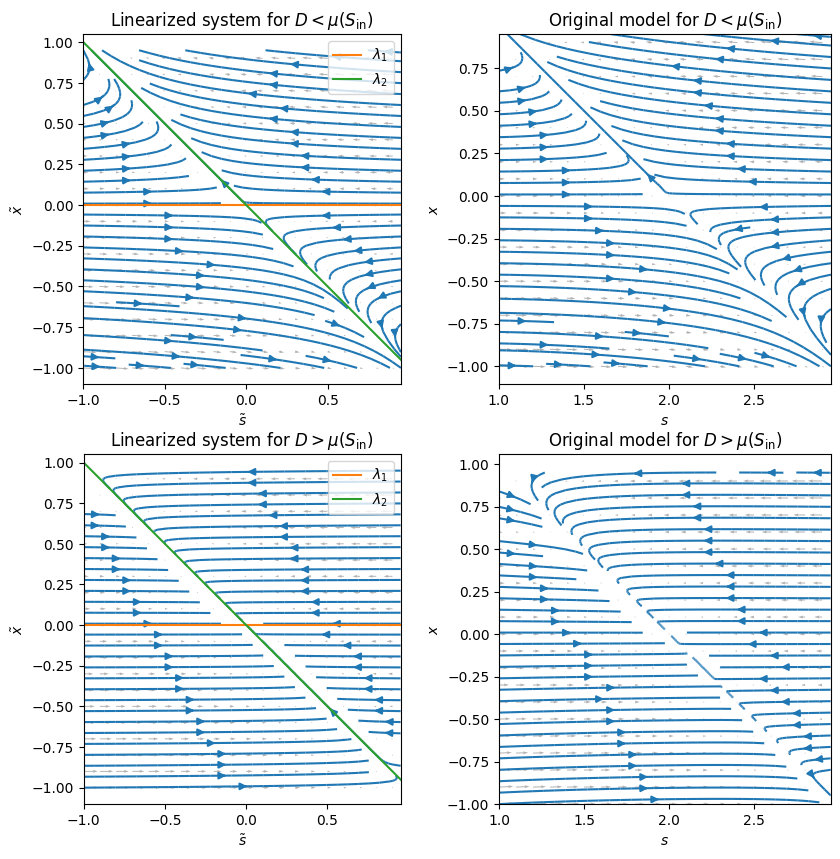

In [3]:
f = growth_rate
E0 = equilibria(**params)[0]
size = 2
slim0, xlim0 = set_lims(size=size)
slim, xlim = set_lims(center=E0, size=size)
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

def A(s, x, D=1.0, Sin=2.0, μmax=1.0, ks=0.2, **kw):
    μ = mu(Sin, μmax=μmax, ks=ks)
    ds = -D*s -μ*x
    dx = (μ-D)*x
    return ds, dx

fig, ax = plt.subplots(2, 2)

params.update(D=0.8)
phase_portrait(slim0, xlim0, A, ax=ax[0,0], **plot_params)
plot_eigenspaces([1,0], [1,-1], ax=ax[0,0])
phase_portrait(slim, xlim, f, ax=ax[0,1], **plot_params)

params.update(D=0.92)
phase_portrait(slim0, xlim0, A, ax=ax[1,0], **plot_params)
plot_eigenspaces([1,0], [1,-1], ax=ax[1,0])
phase_portrait(slim, xlim, f, ax=ax[1,1], **plot_params)

label = '{} for $D{}\\mu(S_\\mathrm{{in}})$'
ax[0,0].set_title(label.format('Linearized system','<'))
ax[0,1].set_title(label.format('Original model','<'))
ax[1,0].set_title(label.format('Linearized system','>'))
ax[1,1].set_title(label.format('Original model','>'))
for i in [0,1]:
    ax[i,0].legend()
    ax[i,0].set_xlabel('$\\tilde{s}$')
    ax[i,0].set_ylabel('$\\tilde{x}$')
    ax[i,1].set_xlabel('$s$')
    ax[i,1].set_ylabel('$x$')
plt.show()

We observe around $E_0$ two cases:

- Case $D\lt \mu(\Sin)$: the linearized system is unstable, as solutions have hyperbolic trajectories
  with $S_{A,1}=\vect\cb{(1,0)}$ and $S_{A,2}=\vect\cb{(1,-1)}$ as asymptotes for the hyperbolas,
  diverging along the $S_{A,2}$ axis, the eigenspace associated to the positive eigenvalue
  $\lambda_2 = \mu(\Sin)-D \gt 0$.
- Case $D\gt \mu(\Sin)$: the linearized system is asymptotically stable ($E_0$ is an attractor),
  as solutions have parabolic trajectories with $S_{A,2}$ as an axis of symmetry for the parabolas,
  the eigenspace associated to $\lambda_1=-D$ as $\abs{\lambda_1}\gt\abs{\lambda_2}$.

#### System around $E_1$

We remind that $E_1$ is non-empty only for $D<\mu(\Sin)$ with
$E_1=\cb{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}$.
Let's denote $(s_1,x_1)=\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}$,
the linearized system matrix is
$$B=J(s_1,x_1)=\pmat{-\mu'(s_1)x_1-D & -D\\\mu'(s_1)x_1 & 0}$$

##### Eigenvalues and Eigenvectors

$$\chi_\lambda=\det(B-\lambda Id)
= \vmat{-\mu'(s_1)x_1-D-\lambda & -D\\\mu'(s_1)x_1 & -\lambda}
= \lambda^2 + (\mu'(s_1)x_1 + D)\lambda + \mu'(s_1)x_1D
\implies \begin{cases}
\lambda_1 = -D\lt 0\\
\lambda_2 = -\mu'(s_1)x_1\lt 0
\end{cases}$$

- $S_{B,1} = \ker(B-\lambda_1 Id) = \ker(B+D Id)
  = \ker\pmat{-\mu'(s_1)x_1 & -D\\\mu'(s_1)x_1 & D}
  = \vect\cb{\pmat{D\\-\mu'(s_1)x_1}}$
- $S_{B,2} = \ker(B-\lambda_2 Id) = \ker(B+(\mu'(s_1)x_1) Id)
  = \ker\pmat{-D & -D\\\mu'(s_1)x_1 & \mu'(s_1)x_1}
  = \vect\cb{\pmat{1\\-1}}$

##### Stability around $E_1$

Since $\forall \lambda\in\rho(B), \lambda\lt 0$, $E_1$ is a local attractor.

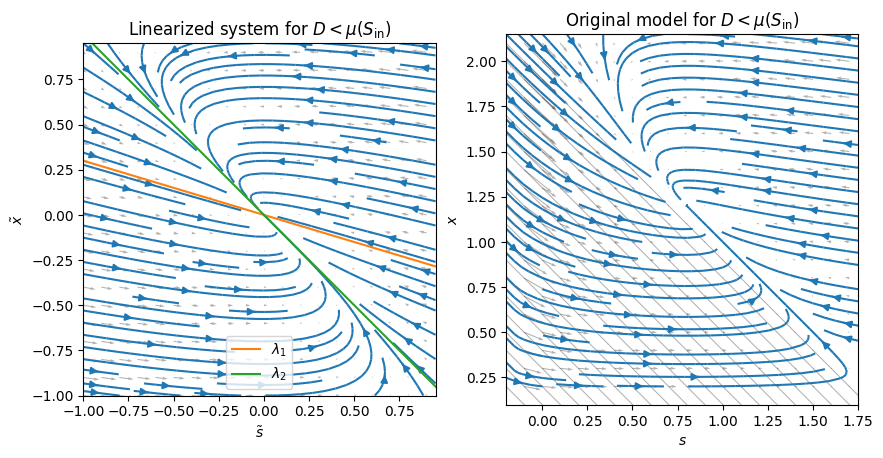

In [4]:
params.update(D=0.8)
E1 = equilibria(**params)[1]
size = 2
slim0, xlim0 = set_lims(size=size)
slim, xlim = set_lims(center=E1, size=size)
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

μx = E1[1] * mu_deriv(E1[0], **params)
def B(s, x, D=1.0, Sin=2.0, μmax=1.0, ks=0.2, **kw):
    s1 = mu_inv(D, μmax=μmax, ks=ks)
    x1 = Sin - s1
    μx = x1 * mu_deriv(s1, μmax=μmax, ks=ks)
    ds = -(μx+D)*s -D*x
    dx = μx*s
    return ds, dx

fig, ax = plt.subplots(1, 2)

phase_portrait(slim0, xlim0, B, ax=ax[0], **plot_params)
plot_eigenspaces([params['D'],-μx], [1,-1], t=[-size,size], ax=ax[0])
phase_portrait(slim, xlim, f, ax=ax[1], **plot_params)

label = '{} for $D{}\\mu(S_\\mathrm{{in}})$'
ax[0].set_title(label.format('Linearized system','<'))
ax[1].set_title(label.format('Original model','<'))
ax[0].legend()
ax[0].set_xlabel('$\\tilde{s}$')
ax[0].set_ylabel('$\\tilde{x}$')
ax[1].set_xlabel('$s$')
ax[1].set_ylabel('$x$')

plt.show()

$E_1$ is a singleton for $D\lt\mu(\Sin)$ if $D\lt\mumax$, in such case,
the linearized system is asymptotically stable ($E_1$ is an attractor),
same as before, having disctinct negative eigenvalues, the solutions
have parabolic trajectories with the eigenspace associated to the
larger eigenvalue in absolute value as the axis of symmetry for the parabolas,
in the plot above $\abs{\lambda_1}\gt\abs{\lambda_2}$.

##### Summary for local stability

|       |$$D<\mu(S_\mathrm{{in}})$$|$$D>\mu(S_\mathrm{{in}})$$|
|:-----:|:------------------------:|:------------------------:|
| $E_0$ |        unstable          |        attractor         |
| $E_1$ |        attractor         |        undefined         |

## Global stability

Along with studying the linearized systems,
plotting the phase portrait is a great way to study
the global behaviour of a dynamical system.

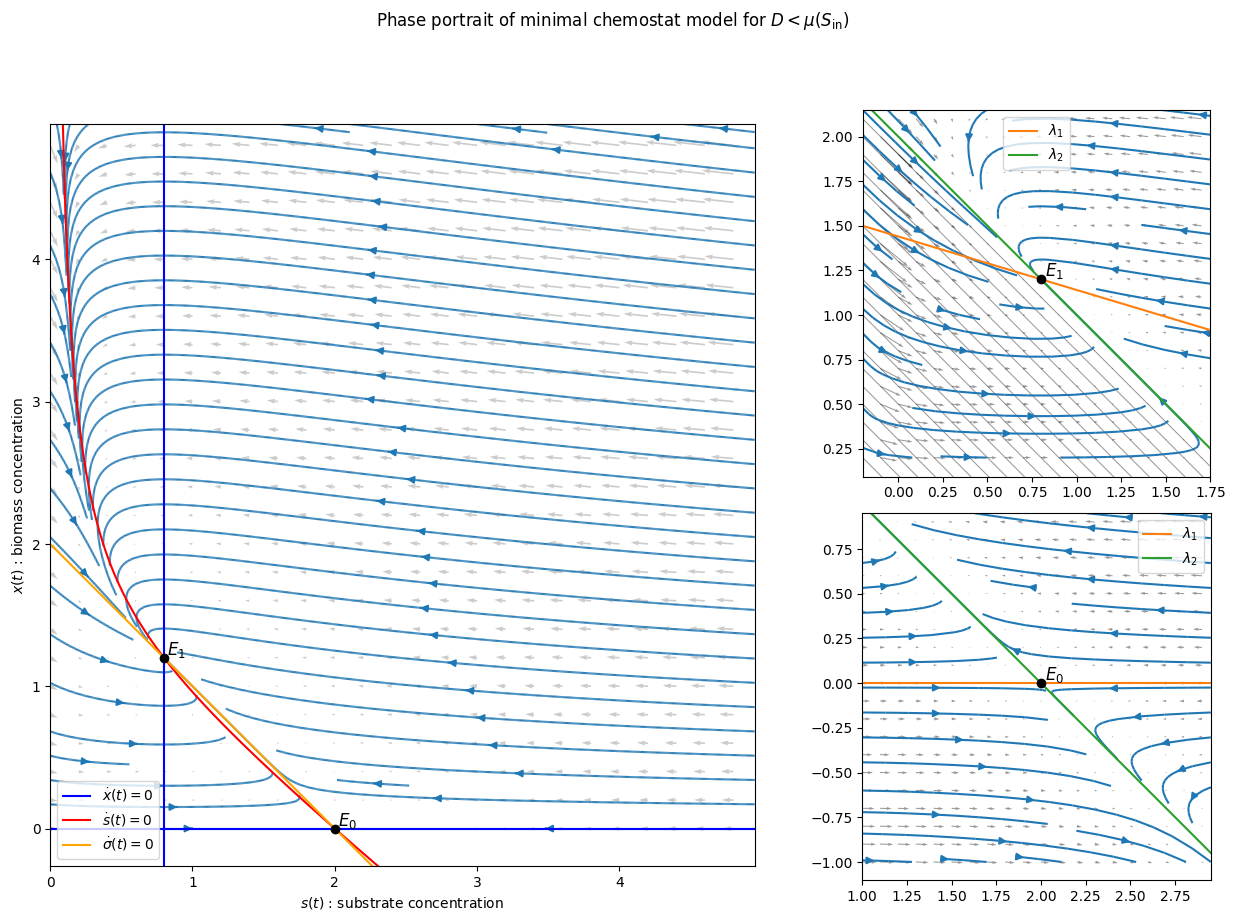

In [5]:
from matplotlib import gridspec

title = 'Phase portrait of minimal chemostat model for $D{}\\mu(S_\\mathrm{{in}})$'
params.update(D=0.8)

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2, width_ratios=(4,2), hspace=0.1)

ax = fig.add_subplot(gs[:,0])
phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format("<"), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)
plot_sigma(ax, **params)

E = equilibria(**params)
eq_text = ['$E_0$', '$E_1$']
plot_equilibria(E, name=eq_text, ax=ax)
ax.legend()

# equilibria plots
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=0.5, alpha=0.4)
size = 2

ax0 = fig.add_subplot(gs[1,1])
slim, xlim = set_lims(center=E[0], size=size)
phase_portrait(slim, xlim, f, ax=ax0, **plot_params)
plot_eigenspaces([1,0], [1,-1], pt=E[0], t=[-size,size], ax=ax0)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax0)
ax0.legend()

ax1 = fig.add_subplot(gs[0,1])
slim, xlim = set_lims(center=E[1], size=size)
phase_portrait(slim, xlim, f, ax=ax1, **plot_params)
plot_eigenspaces([params['D'],-μx], [1,-1], pt=E[1], t=[-size,size], ax=ax1)
plot_equilibria(E[1:], name=eq_text[1:], ax=ax1)
ax1.legend()

plt.show()

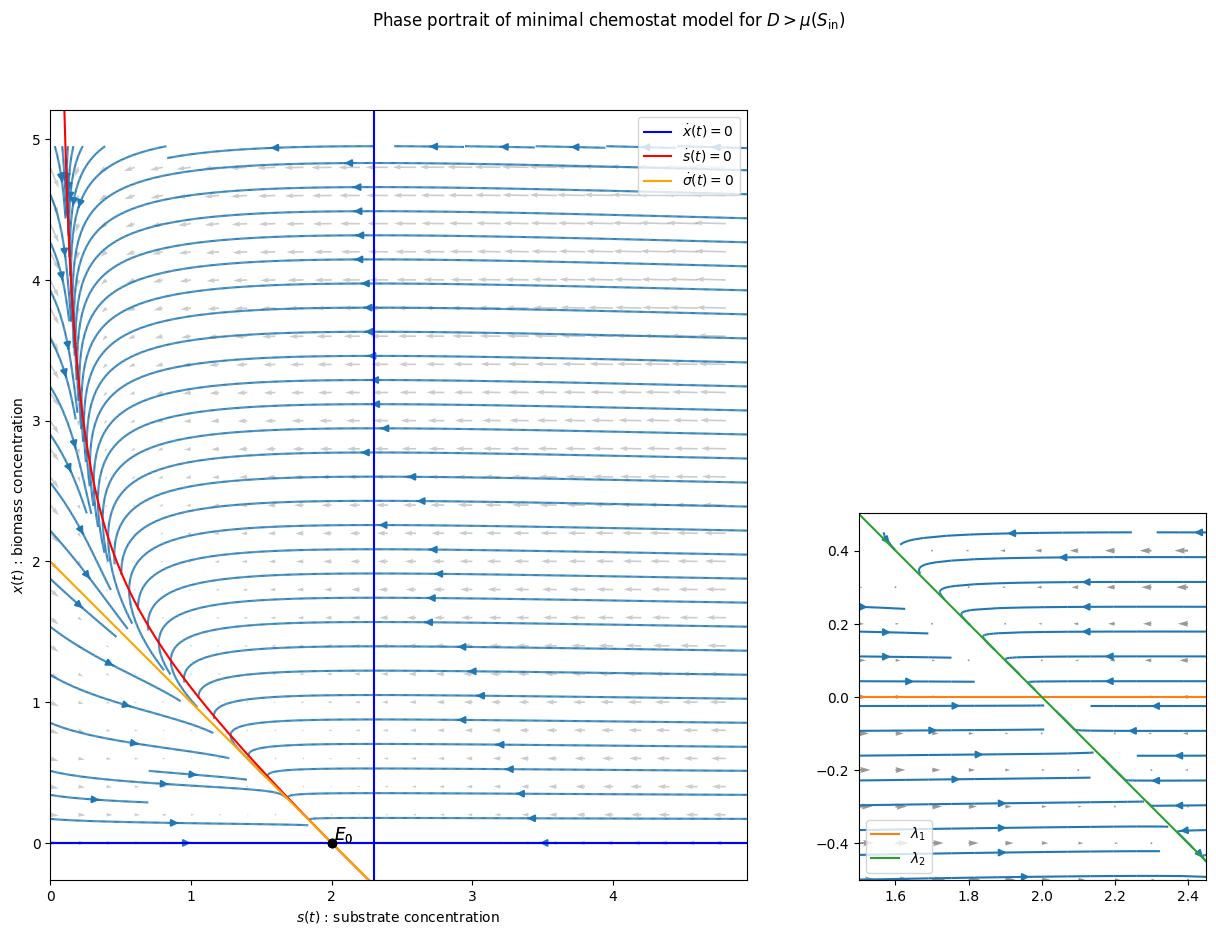

In [6]:
params.update(D=0.92)
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2, width_ratios=(4,2), hspace=0.1)

ax = fig.add_subplot(gs[:,0])
phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format(">"), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)
plot_sigma(ax, **params)
E = equilibria(**params)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax)
ax.legend()

# equilibria plots
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=0.5, alpha=0.4)
size = 1

ax0 = fig.add_subplot(gs[1,1])
slim, xlim = set_lims(center=E[0], size=size)
phase_portrait(slim, xlim, f, ax=ax0, **plot_params)
plot_eigenspaces([1,0], [1,-1], pt=E[0], t=[-2*size,2*size], ax=ax0)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax)
ax0.legend()

plt.show()

## Toward less minimalism

Now that we have studied the dynamics of the minimal model,
we would like to add two terms to the equations :

- A decay term $(-k_d vx)$ to the biomass growth equation to account for the natural death of microorganisms.
- A maintenance term $(-k_m vx)$ to the substrate consumption equation to account for the substrate used for biomass sustenance.

$$\begin{cases}
\dvxdt &=\mu(\cdot)vx - \Fout x - k_d vx\\
\dvsdt &=-\frac{\mu(\cdot)}{Y}vx + \Fin\Sin - \Fout s - k_m vx
\end{cases}$$

Similarly to before, we can express these equations in terms of concentrations

$$\begin{cases}
\dsdt = -\pp{\frac{\mu(\cdot)}{Y} + k_m}x + D(\Sin - s)\\
\dxdt = (\mu(\cdot) - D - k_d)x
\end{cases}$$

We can now study the model dynamics

### Conservation principle

In the previous model, by defining $\sigma=Ys+x$ we obtained an exponentially
attracting invariant set $\Sigma$.
Unfortunately, the equation for $\sigma$ is not autonomous in this model
since the decay and the maintenance terms appear in the equation for $\sigma$.
Therefore, the conservation is lost, and the invariance cannot be exploited anymore.

### Nullclines

#### Biomass nullcline $\dxdt=0$

$$ I_x = \sset{(s,x)\in\R^2_+}{\dxdt=0}
= \sset{(s,x)\in\R^2_+}{(\mu(s) - D - k_d)x=0}
= \cb{(s,0)\in\R^2_+} \cup \sset{(\mu^{-1}(D + k_d),x)\in\R^2}{D + k_d\lt\mumax}$$

We have as in the minimal model $\cb{(s,0)}$ the horizontal axis, which corresponds to no biomass ($x=0$).

The set $\cb{(\mu^{-1}(D+k_d),x)}$ corresponds to a vertical line defined if $D+k_d\lt\mumax$ for any Monod-type function.

The biomass nullcline is therefore the union of these two lines
(if the vertical line is well-defined).
The vertical line here, if it exists, is simply the translation of the vertical isocline from the minimal
model to the right.

#### Substrate nullcline $\dsdt=0$

Similarly as for the biomass, we aim to find the states $(s,x)$
that leave the substrate concentration invariant.

$$I_s = \sset{(s,x)\in\R^2_+}{\dsdt=0}
= \sset{(s,x)\in\R^2_+}{-\pp{\frac{\mu(s)}{Y} + k_m}x + D(\Sin - s) = 0}
= \cb{\pp{s,\frac{D(\Sin - s)}{\pp{\frac{\mu(s)}{Y} + k_m}}}\in\R^2_+}$$

### Equilibria

$E = I_s \cap I_x = E_0 \cup E_1$ where

- $E_0=\cb{\pp{\Sin,0}}$
- $E_1=\sset{s,\pp{s,\frac{D(\Sin - s)}{\frac{\mu(s)}{Y} + k_m}}}{s=\mu^{-1}(D + k_d),\mu(\Sin)>D+k_d}$

While $E_0$ exists, and lays on the $x=0$ nullcline.
However, similarly to the minimal model equilibrium point, $E_1$ is empty if $\mu(\Sin)<D+k_d$
as the equilibrium falls in the fourth quadrant ($x<0$).
In the case $\mu(\Sin)=D+kd$ we have $E_0 = E_1$.

Moreover, $\mu^{-1}(D+k_d)$ is only defined for $D+k_d\lt\mumax$.
Hence, $E_1$ is non-empty for $D+k_d\in]\mu(\Sin),\mumax[$.

### Stability around equilibria

We start by calculating the Jacobian of the system
$$\begin{cases}
\dsdt = -\pp{\frac{\mu(s)}{Y} + k_m}x + D(\Sin - s)\\
\dxdt = (\mu(s) - D - k_d)x
\end{cases}$$

$$J(s,x) = \pmat{-\frac{\mu'(s)}{Y}x - D & -\frac{\mu(s)}{Y} - k_m \\\mu'(s)x & \mu(s)-D-k_d}$$

#### System around $E_0$

$$A=J(\Sin,0)=\pmat{-D & -\frac{\mu(\Sin)}{Y} - k_m\\0 & \mu(\Sin)-D-k_d}$$

$$\chi_\lambda=\det(A-\lambda Id)
\implies \begin{cases}
\lambda_1 = -D\\
\lambda_2 = \mu(\Sin)-D-k_d
\end{cases}$$

- $S_{A,1} = \ker(A-\lambda_1 Id) = \ker\pmat{0 & -\frac{\mu(\Sin)}{Y} - k_m\\0 & \mu(\Sin)-k_d} = \vect\cb{\pmat{1\\0}}$
- $S_{A,2} = \ker(A-\lambda_2 Id) = \ker\pmat{-\mu(\Sin)+k_d & -\frac{\mu(\Sin)}{Y} - k_m\\0 & 0} = \vect\cb{\pmat{\frac{\mu(\Sin)}{Y} + k_m\\-\mu(\Sin)+k_d}}$

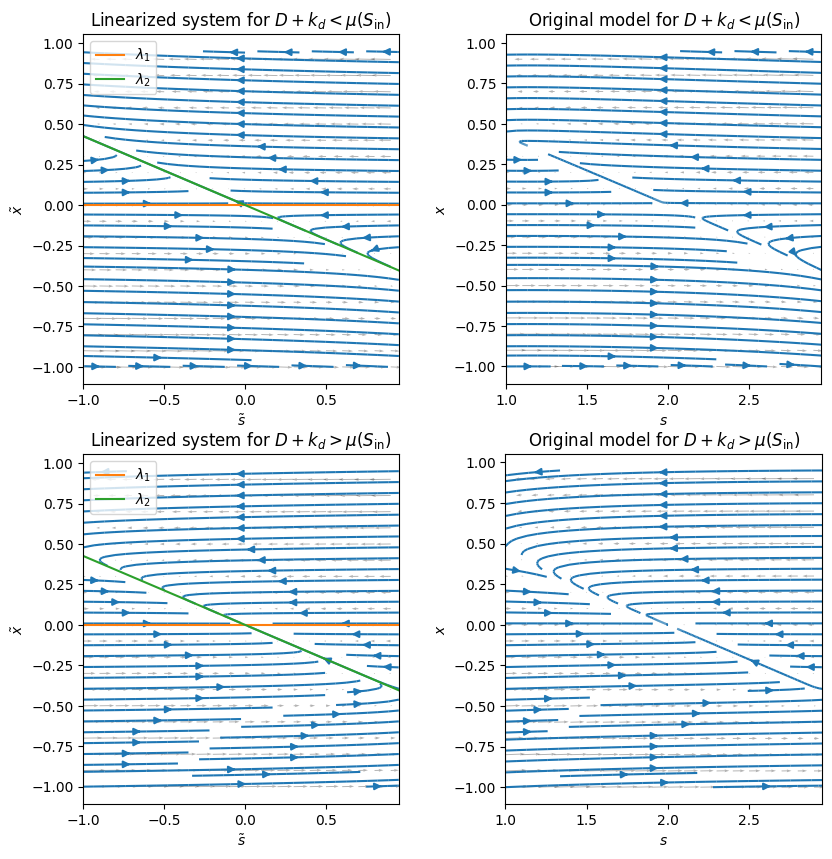

In [7]:
E0 = equilibria(**params)[0]
size = 2
slim0, xlim0 = set_lims(size=size)
slim, xlim = set_lims(center=E0, size=size)
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

def A(s, x, D=1.0, Sin=2.0, μmax=1.0, ks=0.2, Y=1.0, km=0, kd=0):
    μ = mu(Sin, μmax=μmax, ks=ks)
    ds = -D*s -(μ/Y + km)*x
    dx = (μ-D-kd)*x
    return ds, dx

fig, ax = plt.subplots(2, 2)

params.update(Y=0.5, kd=0.05, km=0.2)
def S_A2(**kw):
    μ = mu(kw['Sin'], **kw)
    s = μ/kw['Y'] + kw['km']
    x = -μ+kw['kd']
    return [s, x]

params.update(D=0.8)
phase_portrait(slim0, xlim0, A, ax=ax[0,0], **plot_params)
plot_eigenspaces([1,0], S_A2(**params), ax=ax[0,0])
phase_portrait(slim, xlim, f, ax=ax[0,1], **plot_params)

params.update(D=0.9)
phase_portrait(slim0, xlim0, A, ax=ax[1,0], **plot_params)
plot_eigenspaces([1,0], S_A2(**params), ax=ax[1,0])
phase_portrait(slim, xlim, f, ax=ax[1,1], **plot_params)

label = '{} for $D+k_d{}\\mu(S_\\mathrm{{in}})$'
ax[0,0].set_title(label.format('Linearized system','<'))
ax[0,1].set_title(label.format('Original model','<'))
ax[1,0].set_title(label.format('Linearized system','>'))
ax[1,1].set_title(label.format('Original model','>'))
for i in [0,1]:
    ax[i,0].legend()
    ax[i,0].set_xlabel('$\\tilde{s}$')
    ax[i,0].set_ylabel('$\\tilde{x}$')
    ax[i,1].set_xlabel('$s$')
    ax[i,1].set_ylabel('$x$')
plt.show()

#### System around $E_1$

$$B=J(s_1,x_1)=\pmat{-\frac{\mu'(s_1)}{Y}x_1-D & -\frac{D+k_d}{Y} - k_m\\\mu'(s_1)x_1 & 0}$$

$$\chi_\lambda=\det(B-\lambda Id)=\lambda^2 - \mathrm{tr}(B)\lambda + \det(B)$$

The added terms for decay and maintenance changes the behaviour around $E_1$.
For certain values of $k_d$ and $k_m$ the eigenvalues of $B$ are real distinct negative values.
However, in other cases $B$ can have complex conjugate eigenvalues whose real part is negative.
We can make the conclusion that the system is asymptotically stable around $E_1$.

The implicit expressions for the eigenvalues are not simple,
we can trace the phase portrait around $E_1$ to help visualize the system behaviour around $E_1$

for D = 0.8, we have λ1 = -1.7287746161513815, λ2 = -1.1329797698135304
for D = 0.9, we have λ1 = (-1.1649999999999996+0.3798354907061741j), λ2 = (-1.1649999999999996-0.3798354907061741j)


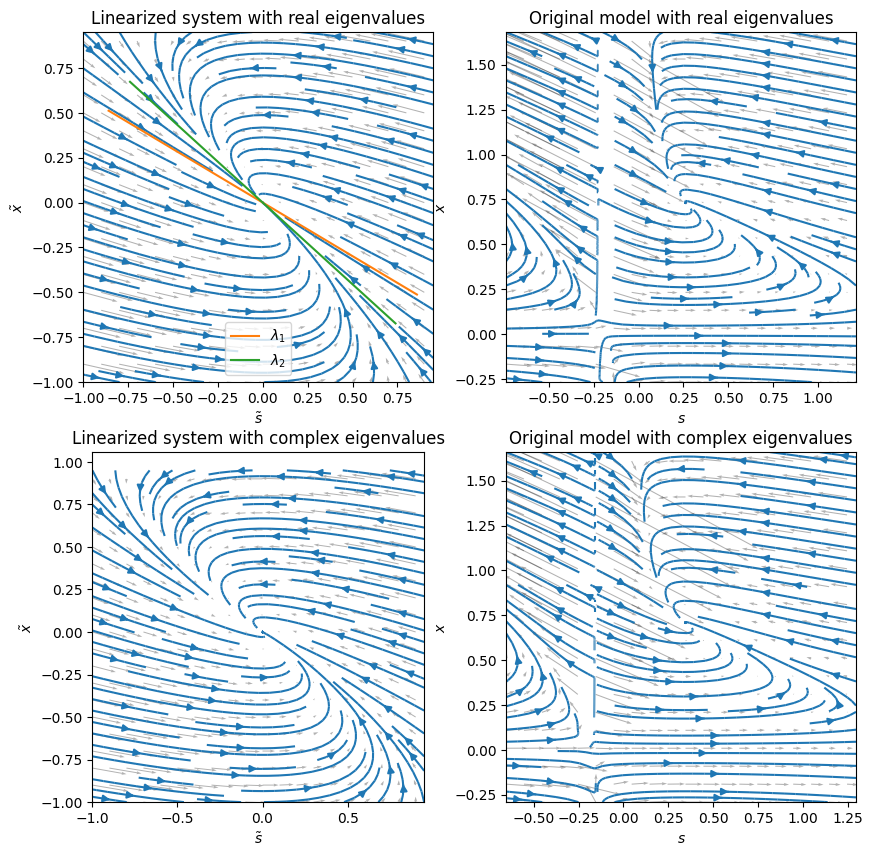

In [8]:
params.update(D=0.8, μmax=1.5, Y=0.5, kd=0.05, km=0.2)
size = 2
slim0, xlim0 = set_lims(size=size)
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

def jacobian_E1(**params):
    μx1 = mu_deriv(E1[0], **params) * E1[1]
    B = [
        [-μx1/params['Y']-params['D'], -(params['D']+params['kd'])/params['Y']-params['km']],
        [μx1, 0]
    ]
    return np.array(B)

def linear_E1(s, x, **params):
    B = jacobian_E1(**params)
    return B[0,0]*s + B[0,1]*x, B[1,0]*s + B[1,1]*x

fig, ax = plt.subplots(2, 2)

params.update(D=0.8)
E1 = equilibria(**params)[1]
phase_portrait(slim0, xlim0, linear_E1, ax=ax[0,0], **plot_params)
w, v = np.linalg.eig(jacobian_E1(**params))
plot_eigenspaces(v[:,0], v[:,1], ax=ax[0,0])
slim, xlim = set_lims(center=E1, size=size)
phase_portrait(slim, xlim, f, ax=ax[0,1], **plot_params)
print('for D = {}, we have λ1 = {}, λ2 = {}'.format(params['D'], w[0], w[1]))

params.update(D=0.9)
E1 = equilibria(**params)[1]
phase_portrait(slim0, xlim0, linear_E1, ax=ax[1,0], **plot_params)
slim, xlim = set_lims(center=E1, size=size)
phase_portrait(slim, xlim, f, ax=ax[1,1], **plot_params)
w, v = np.linalg.eig(jacobian_E1(**params))
print('for D = {}, we have λ1 = {}, λ2 = {}'.format(params['D'], w[0], w[1]))

label = '{} with {} eigenvalues'
ax[0,0].set_title(label.format('Linearized system','real'))
ax[0,1].set_title(label.format('Original model','real'))
ax[1,0].set_title(label.format('Linearized system','complex'))
ax[1,1].set_title(label.format('Original model','complex'))
for i in [0,1]:
    ax[i,0].set_xlabel('$\\tilde{s}$')
    ax[i,0].set_ylabel('$\\tilde{x}$')
    ax[i,1].set_xlabel('$s$')
    ax[i,1].set_ylabel('$x$')
ax[0,0].legend()
plt.show()

## Global Stability

/mnt/data/repositories/chemostat-models/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


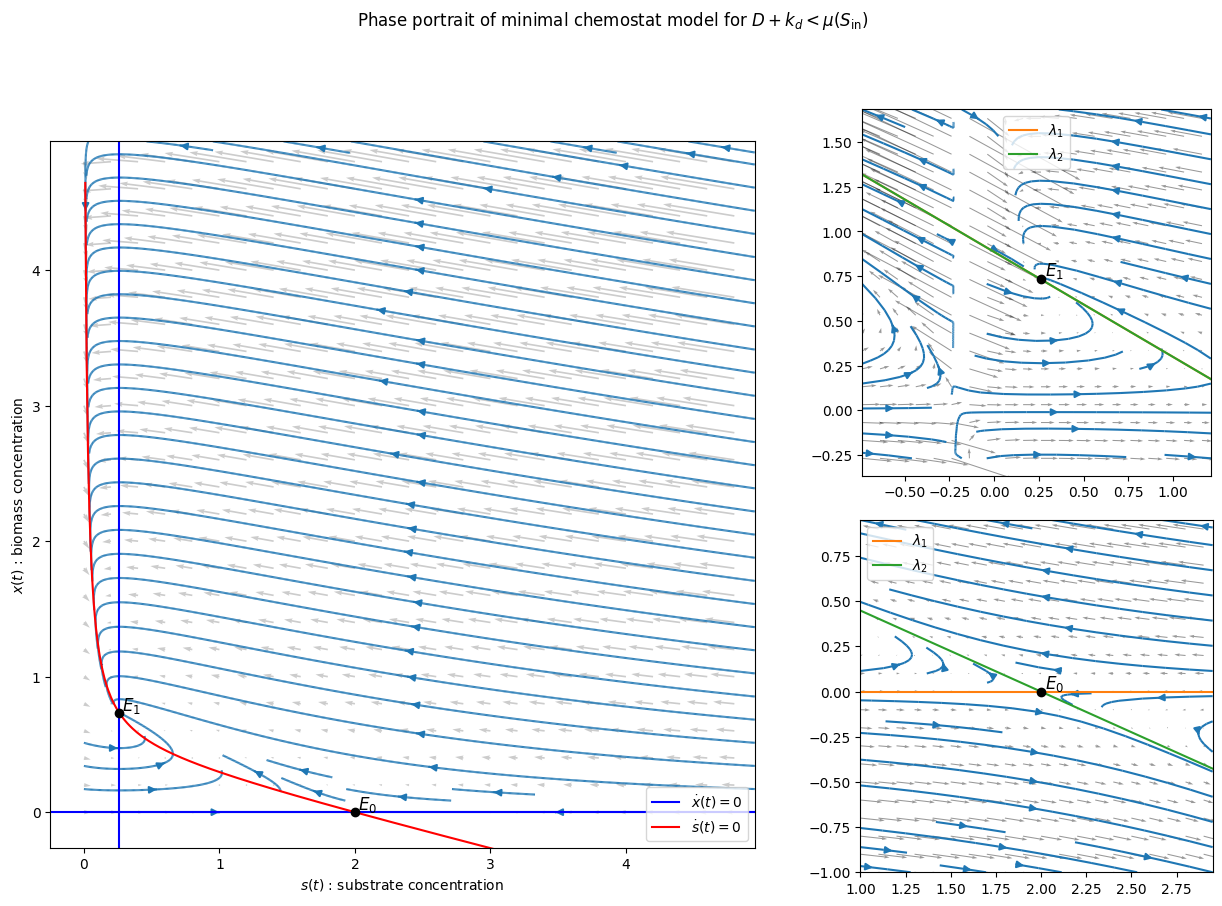

In [9]:
title = 'Phase portrait of minimal chemostat model for $D+k_d{}\\mu(S_\\mathrm{{in}})$'
params.update(D=0.8, μmax=1.5, Y=0.5, kd=0.05, km=0.2)

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2, width_ratios=(4,2), hspace=0.1)

ax = fig.add_subplot(gs[:,0])
phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format("<"), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)

E = equilibria(**params)
eq_text = ['$E_0$', '$E_1$']
plot_equilibria(E, name=eq_text, ax=ax)
ax.legend()

# equilibria plots
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=0.5, alpha=0.4)
size = 2

ax0 = fig.add_subplot(gs[1,1])
slim, xlim = set_lims(center=E[0], size=size)
phase_portrait(slim, xlim, f, ax=ax0, **plot_params)
plot_eigenspaces([1,0], S_A2(**params), pt=E[0], t=[-size,size], ax=ax0)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax0)
ax0.legend()

ax1 = fig.add_subplot(gs[0,1])
slim, xlim = set_lims(center=E[1], size=size)
phase_portrait(slim, xlim, f, ax=ax1, **plot_params)
w, v = np.linalg.eig(jacobian_E1(**params))
plot_eigenspaces(v[:,0], v[:,1], pt=E[1], t=[-size,size], ax=ax1)
plot_equilibria(E[1:], name=eq_text[1:], ax=ax1)
ax1.legend()

plt.show()

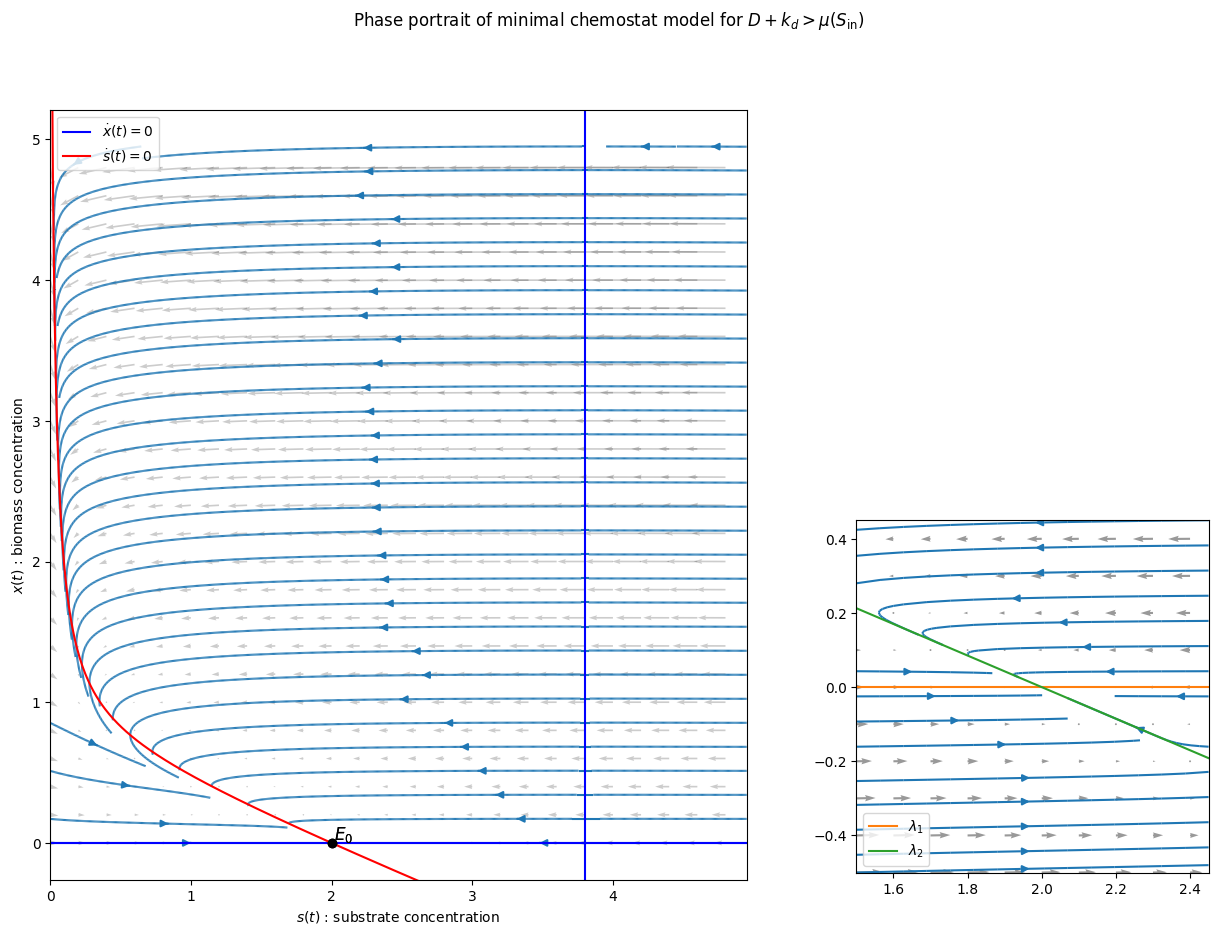

In [10]:
params.update(D=0.9, μmax=1)
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2, width_ratios=(4,2), hspace=0.1)

ax = fig.add_subplot(gs[:,0])
phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format(">"), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)
E = equilibria(**params)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax)
ax.legend()

# equilibria plots
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=0.5, alpha=0.4)
size = 1

ax0 = fig.add_subplot(gs[1,1])
slim, xlim = set_lims(center=E[0], size=size)
phase_portrait(slim, xlim, f, ax=ax0, **plot_params)
plot_eigenspaces([1,0], S_A2(**params), pt=E[0], t=[-2*size,2*size], ax=ax0)
plot_equilibria(E[:1], name=eq_text[:1], ax=ax)
ax0.legend()

plt.show()